# Unsupervised
## Claster

In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [62]:
df_raw = pd.read_csv('./data/Airbnb listings in Ottawa (May 2016).csv')
df = df_raw.copy()

In [63]:
df.head(10)

,Unnamed: 0,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,25468,106030,Private room,NaN,BEACON HILL-CYRVILLE,8,4.5,2,1.0,NaN,29.0,2.0,45.450053,-75.589091,2016-05-16 23:47:32.757633
1,1,34220,147438,Private room,NaN,CAPITAL,0,NaN,2,1.0,1.0,161.0,7.0,45.409237,-75.678999,2016-05-16 23:14:17.559013
2,2,36642,157787,Private room,NaN,KITCHISSIPPI,60,4.5,2,1.0,NaN,56.0,1.0,45.401591,-75.746794,2016-05-16 23:12:51.307224
3,3,42100,184023,Private room,NaN,GLOUCESTER-SOUTH NEPEAN,0,NaN,1,1.0,2.0,31.0,1.0,45.320071,-75.607080,2016-05-16 22:58:04.288813
4,4,59258,284351,Entire home/apt,NaN,BAY,1,NaN,4,1.0,1.0,128.0,3.0,45.358996,-75.803144,2016-05-17 00:11:06.877538
5,5,60281,285215,Entire home/apt,NaN,RIDEAU-VANIER,8,5.0,2,1.0,1.0,79.0,1.0,45.431350,-75.664312,2016-05-16 23:53:37.349310
6,6,61585,298219,Private room,NaN,SOMERSET,0,NaN,1,1.0,1.0,70.0,1.0,45.410572,-75.698833,2016-05-16 23:19:52.479164
7,7,104288,451740,Entire home/apt,NaN,RIDEAU-VANIER,27,4.5,6,3.0,2.0,96.0,2.0,45.422346,-75.670573,2016-05-16 23:58:17.002897
8,8,134033,657917,Private room,NaN,KITCHISSIPPI,52,5.0,2,1.0,NaN,36.0,2.0,45.407400,-75.729827,2016-05-16 23:18:27.396976
9,9,152887,735312,Private room,NaN,BAY,58,4.5,4,1.0,1.0,56.0,1.0,45.363706,-75.796863,2016-05-16 22:33:44.854444


In [64]:
coordinates = df.loc[:,['longitude', 'latitude']]

In [65]:
coordinates.head()

,longitude,latitude
0,-75.589091,45.450053
1,-75.678999,45.409237
2,-75.746794,45.401591
3,-75.607080,45.320071
4,-75.803144,45.358996


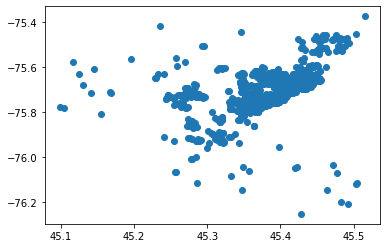

In [66]:
plt.scatter(df['latitude'],df['longitude'])

In [67]:
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(coordinates)
    wcss.append(kmeans.inertia_)

C:\Users\Piotr Sroka\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Piotr Sroka\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Piotr Sroka\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Piotr Sroka\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

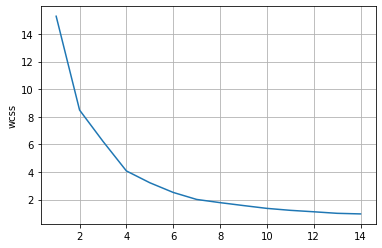

In [68]:
plt.plot(range(1,15),wcss)
plt.ylabel('wcss')
plt.grid()
plt.show()

In [69]:
kmeans = KMeans(n_clusters=5, max_iter=300, random_state=1)
clusters = kmeans.fit_predict(coordinates)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

C:\Users\Piotr Sroka\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [70]:
h = 0.001
x_min, x_max = coordinates['longitude'].min(), coordinates['longitude'].max()
y_min, y_max = coordinates['latitude'].min(), coordinates['latitude'].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

C:\Users\Piotr Sroka\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


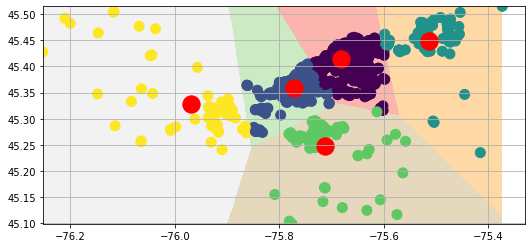

In [74]:
plt.figure(1,figsize=(10,4))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Pastel1, origin='lower')
plt.scatter(x=coordinates['longitude'], y = coordinates['latitude'], c=labels, s=100)
plt.scatter(x=centroids[:,0],y=centroids[:,1],s=300,c='red')
plt.grid()
plt.show()
